In [1]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t = pd.read_csv('./KO.csv', index_col=0)

In [3]:
t

,Day 0,Day 1,Day 2,Day 3,Day 1.1,Day 2.1,Day 3.1,Day 1.2,Day 2.2,Day 3.2
pH,7.54700,7.575000,7.558000,7.532000,7.542000,7.512000,7.467000,7.552000,7.546000,7.532000
Glucose(mmol/L),16.76325,17.540354,16.874265,16.374697,17.318324,16.485712,15.042519,17.040787,17.373832,16.652235
Lactate(mmol/L),0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.441385,0.000000,0.000000,0.000000
Glutamine(mmol/L),1.93000,1.980000,1.800000,1.690000,1.900000,1.570000,1.370000,1.920000,1.730000,1.590000
Glutamate(mmol/L),0.32000,0.000000,0.260000,0.250000,0.220000,0.460000,0.530000,0.000000,0.310000,0.250000
Na(mmol/L),149.00000,153.000000,157.000000,160.000000,153.000000,157.000000,160.000000,153.000000,156.000000,158.000000
K(mmol/L),4.20000,4.300000,4.400000,4.500000,4.300000,4.400000,4.500000,4.300000,4.400000,4.400000
NH4(mmol/L),0.41000,0.510000,0.620000,0.680000,0.540000,0.730000,0.900000,0.510000,0.640000,0.720000


In [6]:
def nonlinear_fit(x,a,b):
    return  b - a*np.exp(np.log(2)/22*24*x)

In [7]:
f = [
    'Glucose(mmol/L)', 
    'Glutamate(mmol/L)', 
#     'NH4(mmol/L)'
]

In [8]:
slope = []

### Control

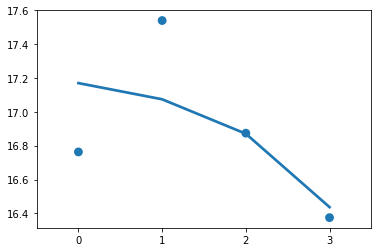

[17.17026765 17.07461067 16.87085344 16.4368338 ]
Glucose(mmol/L)
0.0846460393271493 17.254913690409246


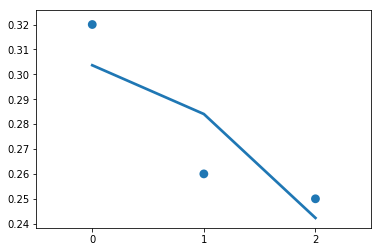

[0.30363615 0.28404612 0.24231774]
Glutamate(mmol/L)
0.017335051653748438 0.3209712003021229


In [9]:
vvv = []
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1', 'Day 2', 'Day 3']].T[i]))
    y = [yy for yy in y if yy != 0]
    x=np.array([xx for xx in range(0, len(y))])
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1]), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)
    print(param[0], param[1])
    vvv.append(param[0])
slope.append(vvv)

### Clone A

In [10]:
def nonlinear_fit(x,a,b):
    return  b - a*np.exp(np.log(2)/12.5*24*x)

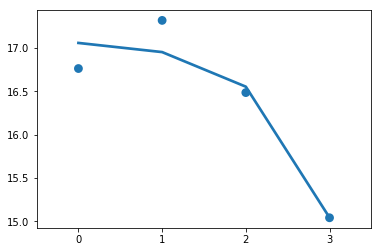

[17.05832423 16.95291596 16.55402673 15.04453792]
Glucose(mmol/L)
0.0378590327677735 17.096183266019555


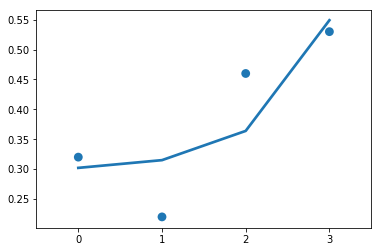

[0.30203514 0.31496701 0.36390417 0.54909367]
Glutamate(mmol/L)
-0.004644681971047866 0.2973904621460839


In [11]:
vvv = []
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1.1', 'Day 2.1', 'Day 3.1']].T[i]))
    y = [yy for yy in y if yy != 0]
    x=np.array([xx for xx in range(0, len(y))])
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1]), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)
    print(param[0], param[1])
    vvv.append(param[0])
slope.append(vvv)

### Clone B

In [12]:
def nonlinear_fit(x,a,b):
    return  b - a*np.exp(np.log(2)/17*24*x)

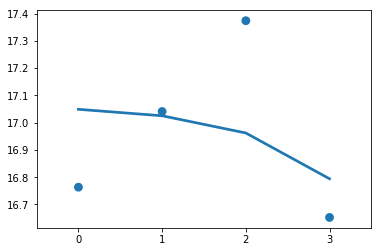

[17.04887556 17.02514858 16.96202002 16.79405864]
Glucose(mmol/L)
0.014287987036586668 17.063163546049587


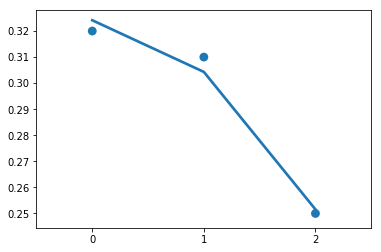

[0.3241365  0.30430879 0.25155471]
Glutamate(mmol/L)
0.011939913824249353 0.33607641316170084


In [13]:
vvv = []
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1.2', 'Day 2.2', 'Day 3.2']].T[i]))
    y = [yy for yy in y if yy != 0]
    x=np.array([xx for xx in range(0, len(y))])
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1]), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)
    print(param[0], param[1])
    vvv.append(param[0])
slope.append(vvv)

In [14]:
slope

[[0.0846460393271493, 0.017335051653748438],
 [0.0378590327677735, -0.004644681971047866],
 [0.014287987036586668, 0.011939913824249353]]

In [16]:
pd.DataFrame(slope, columns=['Glucose', 'Glutamate'], index=['Control', 'Clone A', 'Clone B']).to_csv('./result/slope.csv')